In [42]:
import numpy as np
import pandas as pd

study pandas string and pandas data frame

In [4]:
list_1 = ['g','e','f','k','s']
series_1 = pd.Series(list_1)
print(series_1)

0    g
1    e
2    f
3    k
4    s
dtype: object


In [9]:
# creating array and convert it to pandas string
data = np.array(['g','h','i','j','k','l','m'])
series_2 = pd.Series(data)
print(series_2[:5])

0    g
1    h
2    i
3    j
4    k
dtype: object


In [12]:
series_3 = pd.Series(data,index=[10,11,12,13,14,15,16])
print(series_3[16])

m


# Learn Scikit Learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.datasets import load_boston

In [8]:
X,y = load_boston(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [28]:
model_1 = KNeighborsRegressor()
model_2 = LinearRegression()

In [29]:
model_1.fit(X,y)
model_2.fit(X,y)

LinearRegression()

In [30]:
predict_1 = model_1.predict(X)
predict_2= model_2.predict(X)

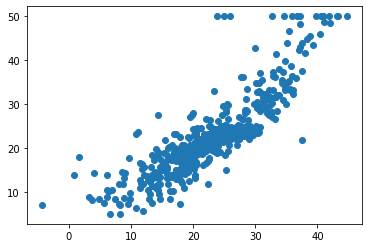

In [31]:
matplotlib.pyplot.scatter(predict_2,y)

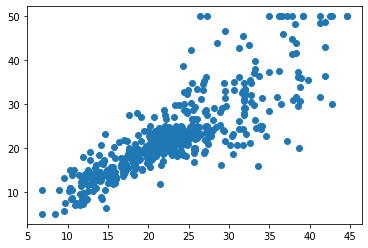

In [32]:
matplotlib.pyplot.scatter(predict_1,y)

## Discusstion about pipeline

In [35]:
#model_3 = KNeighborsRegressor().fit(X,y)

pipe_1 = Pipeline([
    ("Scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])


In [50]:
pipe_1.fit(X_train,y_train)

Pipeline(steps=[('Scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [51]:
predict_3 = pipe_1.predict(X_test)

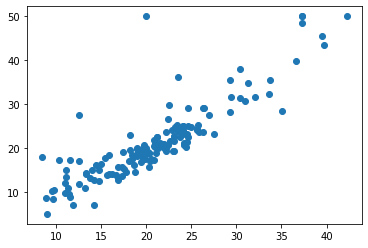

In [53]:
matplotlib.pyplot.scatter(predict_3,y_test)

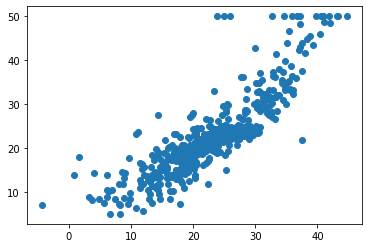

In [39]:
matplotlib.pyplot.scatter(predict_2,y)

## Discusstion about GridSearchCrossValidation and n-neighbores

In [12]:
from sklearn.model_selection import GridSearchCV

In [11]:
# pipeline for model
pipe_2 = Pipeline([
    ("Scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe_2.get_params()

{'memory': None,
 'steps': [('Scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'Scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'Scale__copy': True,
 'Scale__with_mean': True,
 'Scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [26]:
model_4 = GridSearchCV(estimator=pipe_2,
                       param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                      cv=2)


In [27]:
model_4.fit(X,y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
results = pd.DataFrame(model_4.cv_results_)

In [29]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001456      0.000269         0.002730        0.000672   
1       0.001193      0.000012         0.002425        0.000304   
2       0.001437      0.000250         0.002532        0.000323   
3       0.001165      0.000010         0.002890        0.000641   
4       0.001173      0.000004         0.003294        0.000993   
5       0.001043      0.000088         0.002258        0.000110   
6       0.001056      0.000046         0.002224        0.000152   
7       0.000703      0.000108         0.001456        0.000219   
8       0.000596      0.000002         0.001440        0.000189   
9       0.000621      0.000034         0.001511        0.000203   

  param_model__n_neighbors                      params  split0_test_score  \
0                        1   {'model__n_neighbors': 1}           0.592596   
1                        2   {'model__n_neighbors': 2}           0.595976   
2                        3   {'model__n_neighbors': 3}           0.621287   
3                        4   {'model__n_neighbors': 4}           0.612235   
4                        5   {'model__n_neighbors': 5}           0.562670   
5                        6   {'model__n_neighbors': 6}           0.533509   
6                        7   {'model__n_neighbors': 7}           0.479227   
7                        8   {'model__n_neighbors': 8}           0.464862   
8                        9   {'model__n_neighbors': 9}           0.470730   
9                       10  {'model__n_neighbors': 10}           0.479593   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.508426         0.550511        0.042085                4  
1           0.521265         0.558620        0.037356                3  
2           0.545090         0.583189        0.038099                1  
3           0.523880         0.568058        0.044178                2  
4           0.520514         0.541592        0.021078                5  
5           0.519260         0.526384        0.007124                6  
6           0.508332         0.493779        0.014552                7  
7           0.503690         0.484276        0.019414                8  
8           0.491882         0.481306        0.010576               10  
9           0.488479         0.484036        0.004443                9